# Linear Regression using TensorFlow

Use Toluca Dataset from  https://github.com/rahulbhadani/cpe490590_ml_sp24/tree/main/Dataset/Toluca
to implement a linear regression model to predict **Work Hour** given the **Lot Size**. Choose the appropriate value for learning parameter $\eta$ and initial value of your model coefficients. Choose the number of iteration as 1000. (10 points)

- Plot the loss as a function of iteration.
- Plot the coefficients as a function of iteration
- Make a scatter plot of the data and overlay the fitted line. Make sure you label all plots properly.
- How many number of \textbf{WorkHours} are required for the \textbf{LotSize} of 75?
- Plot the WHS confidence band.



In [1]:
# !pip install tensorflow-probability
# !pip install tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

data = pd.read_csv('Dataset/Toluca/toluca.txt', sep='\t')
data

2024-02-22 22:55:34.185817: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-22 22:55:34.188048: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 22:55:34.216784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 22:55:34.216810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 22:55:34.217507: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

,LotSize,WorkHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


# Convert the data into Tensfor for using with Tensorflow

In [2]:

# Convert to TensorFlow tensors
x = tf.constant(data['LotSize'].to_numpy(), dtype=tf.float32)
y = tf.constant(data['WorkHours'].to_numpy(), dtype=tf.float32)


2024-02-22 22:55:37.085574: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Define the Model

In [31]:
# Initialize weights
w_0 = tf.Variable(4.0)
w_1 = tf.Variable(3.0)

# Define the Linear Regression model
def model(X):
    return w_1 * X + w_0

# Define the Cost Function/Loss Function

In [32]:

# Define the loss function (mean squared error)
def loss_fn(Y_hat, Y):
    # tf.reduce_mean calculates the mean of the argument vector
    return tf.reduce_mean(tf.square(Y_hat - Y))

# Set the Optimizer

In [33]:
# Define the optimizer
## Here we will use Stochastic Gradient Descent with Learning Rate of 0.1
optimizer = tf.optimizers.SGD(learning_rate=0.0001)

# Store the values of loss, w_0, and w_1 for plotting
loss_values = []
w_0_values = []
w_1_values = []

# Training Loop

In [34]:

# Training loop
for i in range(100000):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
    gradients = tape.gradient(loss, [w_0, w_1])
    optimizer.apply_gradients(zip(gradients, [w_0, w_1]))
    loss_values.append(loss.numpy())
    w_0_values.append(w_0.numpy())
    w_1_values.append(w_1.numpy())

# Check Your Results

w_0: 58.75469970703125, w_1: 3.6146128177642822


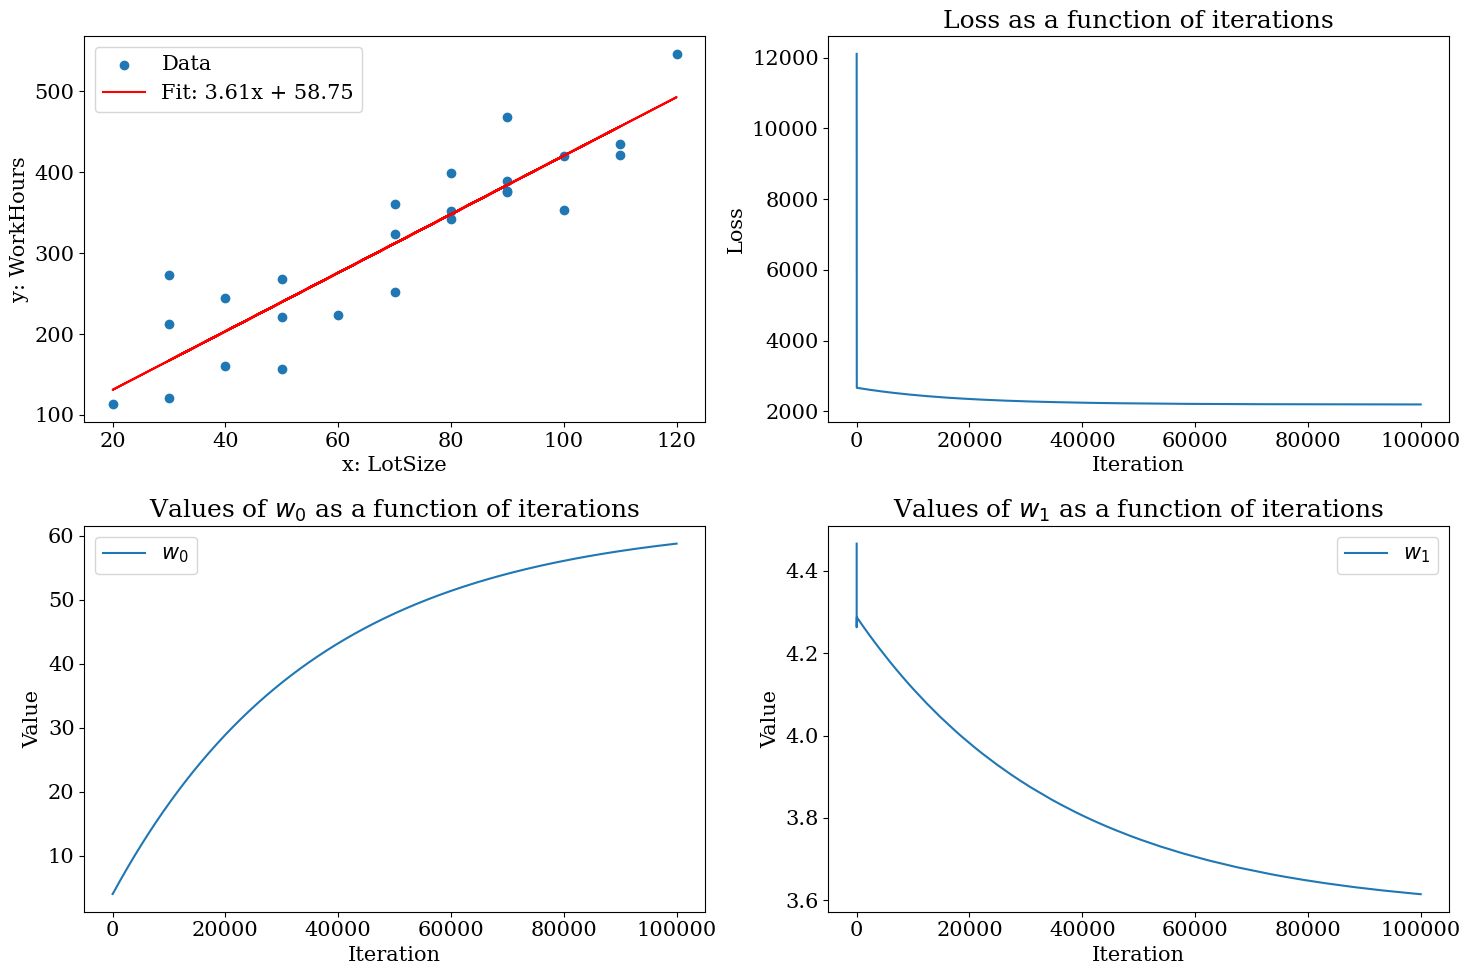

In [35]:


# Print the learned parameters
print(f"w_0: {w_0.numpy()}, w_1: {w_1.numpy()}")

# Plot the data and the learned line
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model(x), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.xlabel('x: LotSize')
plt.ylabel('y: WorkHours')
plt.legend()

# Plot the loss as a function of iterations
plt.subplot(2, 2, 2)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')

# Plot the values of w_0 and w_1 as a function of iterations
plt.subplot(2, 2, 3)
plt.plot(w_0_values, label='$w_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_0$ as a function of iterations')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(w_1_values, label='$w_1$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_1$ as a function of iterations')
plt.legend()

plt.tight_layout()
plt.savefig('./figures/hw03_Q_23_fitline_loss_coeff.pdf', format='pdf', bbox_inches='tight')

plt.show()

# Make Inferences on Data

In [25]:
new_data_points = tf.constant([75.0])
predictions = model(new_data_points).numpy()
for x_new, pred in zip(new_data_points, predictions):
    print(f"The predicted value for x={x_new} is {pred}")


The predicted value for x=75.0 is 326.70147705078125


## Calculating Confidence Interval

In [26]:
y_hat = model(x)
SSE = tf.reduce_sum(tf.square(y - y_hat))
MSE = SSE/(len(data)-2)
SSTO = tf.reduce_sum(tf.square(y -  tf.reduce_mean(y)))
R_squared = 1 - (SSE/SSTO)
R_squared

<tf.Tensor: shape=(), dtype=float32, numpy=0.79943436>

In [27]:
# variance on predicted y
variance_y = MSE*(1/len(data) + (tf.square(x -  tf.reduce_mean(x)  )/(tf.reduce_sum(tf.square(x -  tf.reduce_mean(x))))))
variance_y

<tf.Tensor: shape=(25,), dtype=float32, numpy=
array([120.685165, 323.63107 , 161.27434 , 161.27434 , 107.15543 ,
       120.685165, 445.39862 , 120.685165, 228.92299 , 161.27434 ,
       228.92299 , 107.15543 , 161.27434 , 445.39862 , 323.63107 ,
       228.92299 , 323.63107 , 161.27434 , 161.27434 , 323.63107 ,
       323.63107 , 161.27434 , 228.92299 , 120.685165, 107.15543 ],
      dtype=float32)>

In [28]:
from scipy.stats import f

# Degrees of freedom
df1 = 2
df2 = len(data) - 2  # replace n with your sample size

# Quantile
p = 1 - 0.05  # replace alpha with your significance level

# Calculate the F-statistic
f_statistic = f.ppf(p, df1, df2)


y_upper = y_hat + f_statistic*variance_y
y_upper

<tf.Tensor: shape=(25,), dtype=float32, numpy=
array([ 760.26965, 1249.102  ,  775.7659 ,  940.30615,  672.834  ,
        677.9995 , 2036.0223 ,  760.26965, 1212.9438 ,  775.7659 ,
        966.1335 ,  672.834  ,  940.30615, 1624.6716 , 1578.1825 ,
       1212.9438 , 1249.102  ,  775.7659 ,  940.30615, 1578.1825 ,
       1249.102  ,  940.30615,  966.1335 ,  760.26965,  672.834  ],
      dtype=float32)>

In [29]:
y_lower = y_hat - f_statistic*variance_y
y_lower

<tf.Tensor: shape=(25,), dtype=float32, numpy=
array([  -65.7316 ,  -965.9146 ,  -328.03827,  -163.49802,   -60.56613,
        -148.00171, -1012.4037 ,   -65.7316 ,  -353.86557,  -328.03827,
        -600.67596,   -60.56613,  -163.49802, -1423.7544 ,  -636.8341 ,
        -353.86557,  -965.9146 ,  -328.03827,  -163.49802,  -636.8341 ,
        -965.9146 ,  -163.49802,  -600.67596,   -65.7316 ,   -60.56613],
      dtype=float32)>

Text(0.5, 1.0, 'WHS Band')

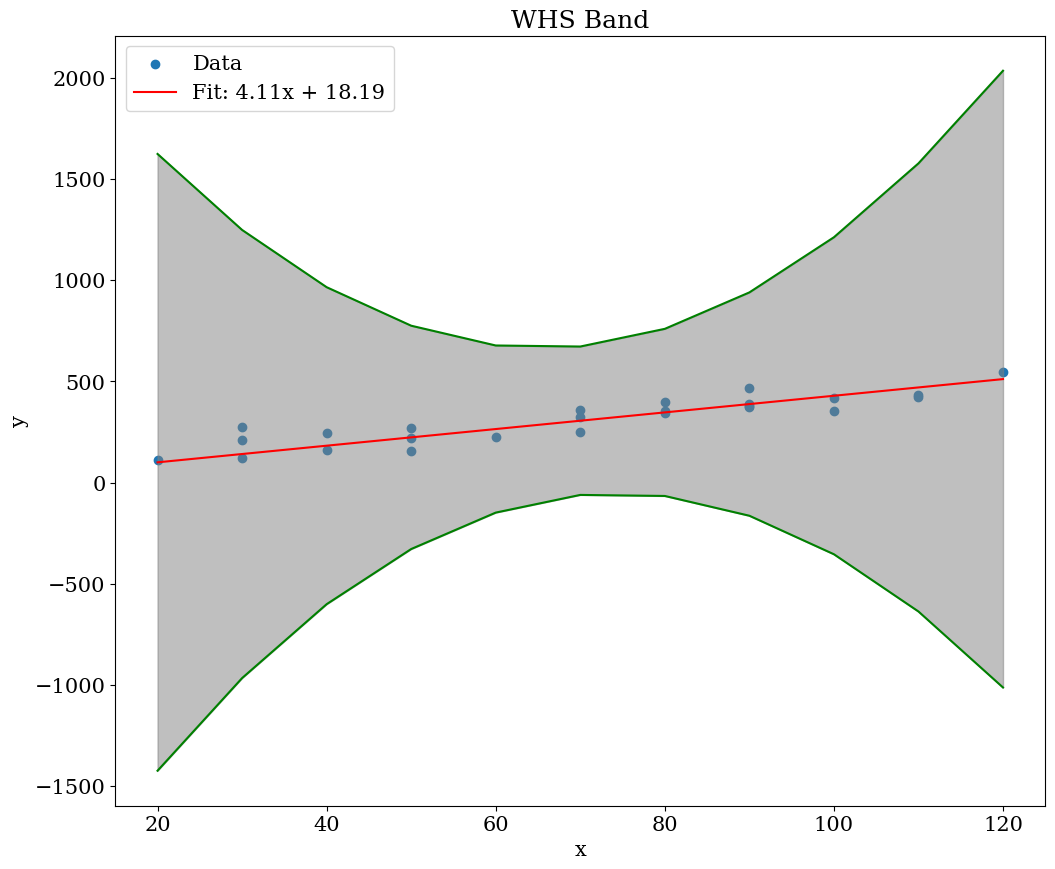

In [30]:
# Plot the data and the learned line
# Sort x, y_lower, and y_upper using the sorted indices
x = np.array(x)
y_lower = np.array(y_lower)
y_upper = np.array(y_upper)

# Get the sorted indices of x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_lower_sorted = y_lower[sorted_indices]
y_upper_sorted = y_upper[sorted_indices]

plt.figure(figsize=(12,10))
plt.scatter(x, y, label='Data')
plt.plot(x_sorted, model(x_sorted), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.plot(x_sorted, y_lower_sorted, color='green')
plt.plot(x_sorted, y_upper_sorted, color='green')
plt.fill_between(x_sorted, y_lower_sorted, y_upper_sorted, color='gray', alpha=0.5)  
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('./figures/hw03_Q_23_WHS.pdf', format='pdf', bbox_inches='tight')
plt.title('WHS Band')